In [31]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
import numpy as np

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Change the data format
x_train = x_train / 255.
x_test = x_test / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [43]:
x_train.shape

(60000, 28, 28, 1)

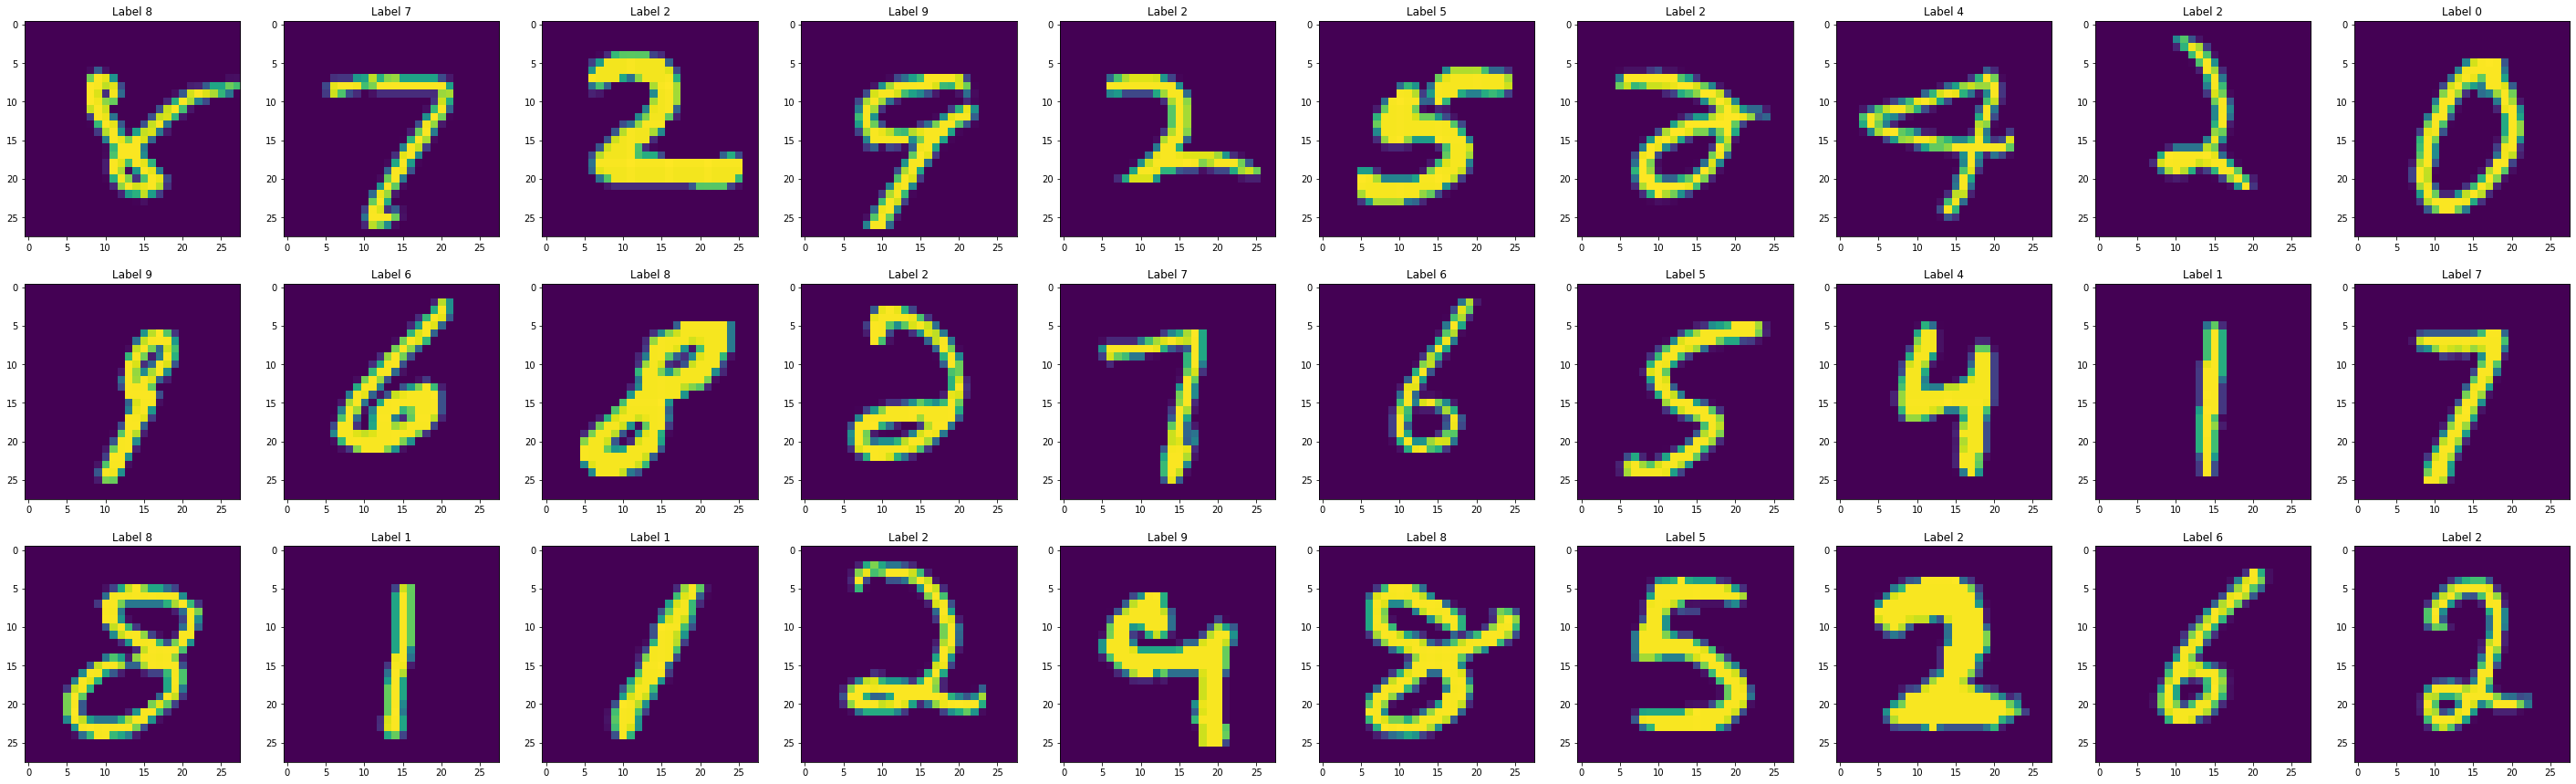

In [34]:
# Plot some of the images
nbr_x = 3
nbr_y = 10
fig, axes = plt.subplots(nbr_x, nbr_y, figsize=(nbr_y*5, nbr_x*5))
for i in range(nbr_x):
    for j in range(nbr_y):
        idx = randrange(0, x_train.shape[0])
        axes[i, j].imshow(x_train[idx])
        axes[i, j].title.set_text(f"Label {y_train[idx]}")


In [35]:
model_flatten = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(100),
    keras.layers.ReLU(),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])
model_flatten.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=keras.metrics.SparseCategoricalAccuracy()
)

In [36]:
model_flatten.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
softmax_7 (Softmax)          (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model_flatten.fit(x=x_train, y=y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3238 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.1668 - val_sparse_categorical_accuracy: 0.9516
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1427 - sparse_categorical_accuracy: 0.9581 - val_loss: 0.1158 - val_sparse_categorical_accuracy: 0.9654
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0995 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.1051 - val_sparse_categorical_accuracy: 0.9685
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0865 - val_sparse_categorical_accuracy: 0.9746
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.0880 - val_sparse_categorical_accuracy: 0.9730
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0499 - sparse_categorica

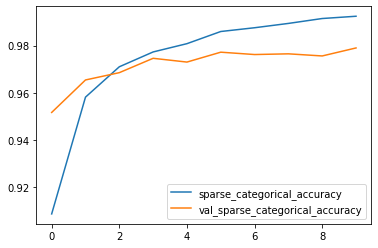

In [38]:
pd.DataFrame(history.history)[['sparse_categorical_accuracy', "val_sparse_categorical_accuracy"]].plot.line();

In [39]:
model_cnn = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Conv2D(10, kernel_size=3, padding="same"),
    keras.layers.Conv2D(30, kernel_size=3, padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])
model_cnn.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=keras.metrics.SparseCategoricalAccuracy()
)

In [40]:
model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 30)        2730      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                58810     
_________________________________________________________________
softmax_8 (Softmax)          (None, 10)                0         
Total params: 61,640
Trainable params: 61,640
Non-trainable params: 0
__________________________________________________

In [41]:
history = model_cnn.fit(x=x_train, y=y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2438 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.0904 - val_sparse_categorical_accuracy: 0.9720
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0849 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.0776 - val_sparse_categorical_accuracy: 0.9757
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0644 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.0652 - val_sparse_categorical_accuracy: 0.9787
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0715 - val_sparse_categorical_accuracy: 0.9775
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0756 - val_sparse_categorical_accuracy: 0.9764
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0409 - sparse_categorica

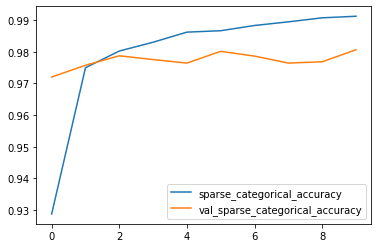

In [42]:
pd.DataFrame(history.history)[['sparse_categorical_accuracy', "val_sparse_categorical_accuracy"]].plot.line();